In [1]:
!pip install yfinance
!pip install prophet

In [2]:
import yfinance as yf

carparts = "PRTS"

start = "2018-1-1"
end = "2023-12-31"

data = yf.download(carparts, start = start, end = end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

Open  High   Low  Close  Adj Close  Volume
Date                                                  
2018-01-02  2.48  2.63  2.43   2.58       2.58  130600
2018-01-03  2.58  2.72  2.56   2.71       2.71   70400
2018-01-04  2.71  2.71  2.50   2.64       2.64   72900
2018-01-05  2.64  2.65  2.51   2.62       2.62   75200
2018-01-08  2.64  2.70  2.57   2.61       2.61   74100
...          ...   ...   ...    ...        ...     ...
2023-12-22  3.43  3.44  3.39   3.40       3.40  662500
2023-12-26  3.39  3.44  3.39   3.40       3.40  601400
2023-12-27  3.40  3.42  3.34   3.35       3.35  426800
2023-12-28  3.34  3.36  3.28   3.31       3.31  281600
2023-12-29  3.32  3.34  3.14   3.16       3.16  439700

[1509 rows x 6 columns]

In [4]:
import pandas as pd
data.reset_index(inplace=True)  # Нулиране на индекса, за да стане 'Date' колона
print(data.columns)
data = data[["Date","Close"]]
data.columns = ["ds","y"]
data

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


ds     y
0    2018-01-02  2.58
1    2018-01-03  2.71
2    2018-01-04  2.64
3    2018-01-05  2.62
4    2018-01-08  2.61
...         ...   ...
1504 2023-12-22  3.40
1505 2023-12-26  3.40
1506 2023-12-27  3.35
1507 2023-12-28  3.31
1508 2023-12-29  3.16

[1509 rows x 2 columns]

In [5]:
train_data = data[(data['ds'] >= '2018-01-01') & (data['ds'] <= '2022-12-31')]
test_data = data[(data['ds'] >= '2023-01-01') & (data['ds'] <= '2023-12-31')]

In [6]:
import io, os, sys, setuptools, tokenize
from prophet import Prophet

train_data.loc[:, 'floor'] = 0
train_data.loc[:, 'cap'] = 30

test_data.loc[:, 'floor'] = 0
test_data.loc[:, 'cap'] = 30

# Инициализиране на модела и обучение
p = Prophet(growth='logistic')
p.fit(train_data)

# Създаване на бъдещ DataFrame за прогнозиране
future = p.make_future_dataframe(periods=365)

# Добавяне на 'floor' и 'cap' в future DataFrame
future['floor'] = 0
future['cap'] = 30

# Предсказване
data_forecast = p.predict(future)

C:\TMP\ipykernel_24204\233344011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, 'floor'] = 0
C:\TMP\ipykernel_24204\233344011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, 'cap'] = 30
C:\TMP\ipykernel_24204\233344011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [7]:
data_forecast

ds     trend  cap  floor  yhat_lower  yhat_upper  trend_lower  \
0    2018-01-02  0.576883   30      0   -1.390333    2.090274     0.576883   
1    2018-01-03  0.577833   30      0   -1.443433    2.202699     0.577833   
2    2018-01-04  0.578785   30      0   -1.327122    2.213833     0.578785   
3    2018-01-05  0.579738   30      0   -1.335738    2.026377     0.579738   
4    2018-01-08  0.582608   30      0   -1.352583    1.999191     0.582608   
...         ...       ...  ...    ...         ...         ...          ...   
1619 2023-12-26  0.955509   30      0   -1.001677    2.515048     0.535170   
1620 2023-12-27  0.951744   30      0   -1.169088    2.651352     0.532205   
1621 2023-12-28  0.947994   30      0   -1.043477    2.563155     0.528597   
1622 2023-12-29  0.944258   30      0   -1.101277    2.694406     0.524787   
1623 2023-12-30  0.940536   30      0   -1.877436    1.597751     0.521104   

      trend_upper  additive_terms  additive_terms_lower  ...    weekly  \
0        0.576883       -0.186581             -0.186581  ...  0.276339   
1        0.577833       -0.226290             -0.226290  ...  0.239566   
2        0.578785       -0.214359             -0.214359  ...  0.254807   
3        0.579738       -0.223042             -0.223042  ...  0.250162   
4        0.582608       -0.277344             -0.277344  ...  0.214629   
...           ...             ...                   ...  ...       ...   
1619     1.448011       -0.130200             -0.130200  ...  0.276339   
1620     1.444170       -0.181812             -0.181812  ...  0.239566   
1621     1.440547       -0.178366             -0.178366  ...  0.254807   
1622     1.436922       -0.192144             -0.192144  ...  0.250162   
1623     1.433049       -1.066965             -1.066965  ... -0.617750   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0         0.276339      0.276339 -0.462920     -0.462920     -0.462920   
1         0.239566      0.239566 -0.465855     -0.465855     -0.465855   
2         0.254807      0.254807 -0.469166     -0.469166     -0.469166   
3         0.250162      0.250162 -0.473204     -0.473204     -0.473204   
4         0.214629      0.214629 -0.491973     -0.491973     -0.491973   
...            ...           ...       ...           ...           ...   
1619      0.276339      0.276339 -0.406538     -0.406538     -0.406538   
1620      0.239566      0.239566 -0.421378     -0.421378     -0.421378   
1621      0.254807      0.254807 -0.433173     -0.433173     -0.433173   
1622      0.250162      0.250162 -0.442306     -0.442306     -0.442306   
1623     -0.617750     -0.617750 -0.449215     -0.449215     -0.449215   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1619                   0.0                         0.0   
1620                   0.0                         0.0   
1621                   0.0                         0.0   
1622                   0.0                         0.0   
1623                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
0                            0.0  0.390301  
1                            0.0  0.351543  
2                            0.0  0.364426  
3                            0.0  0.356697  
4                            0.0  0.305264  
...                          ...       ...  
1619                         0.0  0.825309  
1620                         0.0  0.769932  
1621                         0.0  0.769627  
1622                         0.0  0.752114  
1623                         0.0 -0.126429  

[1624 rows x 21 columns]

D:\JN\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


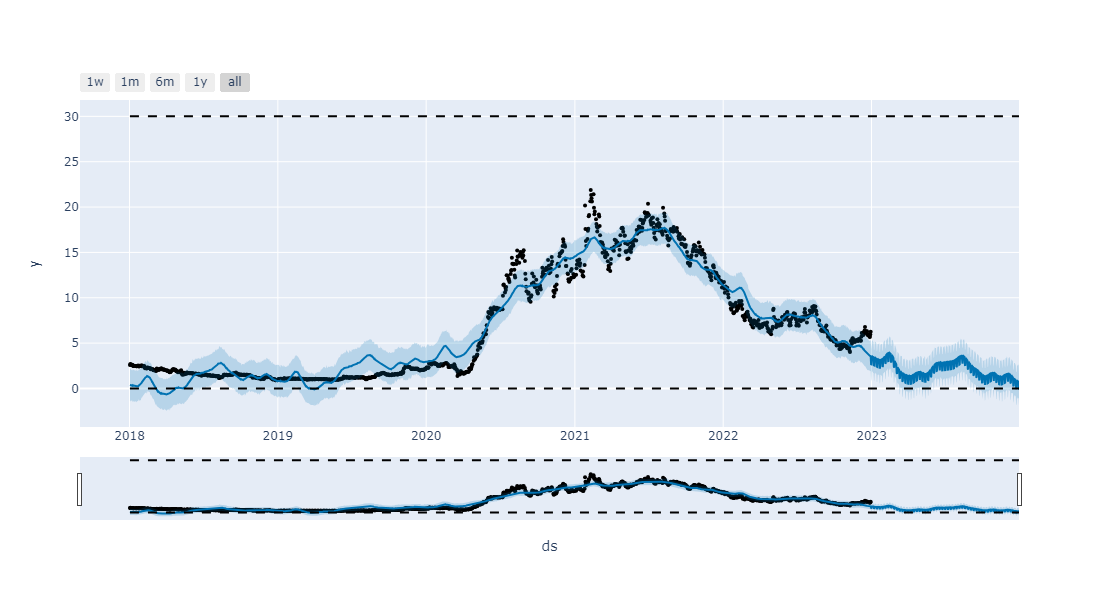

In [8]:
from prophet.plot import plot_plotly
plot_plotly(p, data_forecast)

D:\JN\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



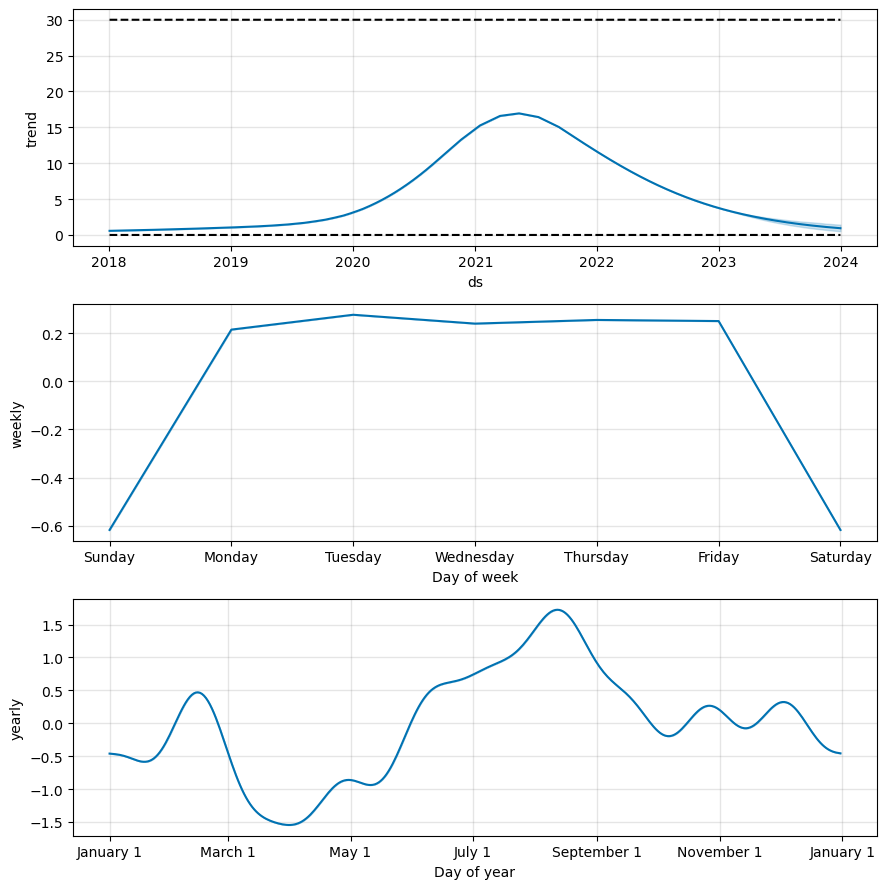

In [9]:
tesla_data_plot = p.plot_components(data_forecast)

D:\JN\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



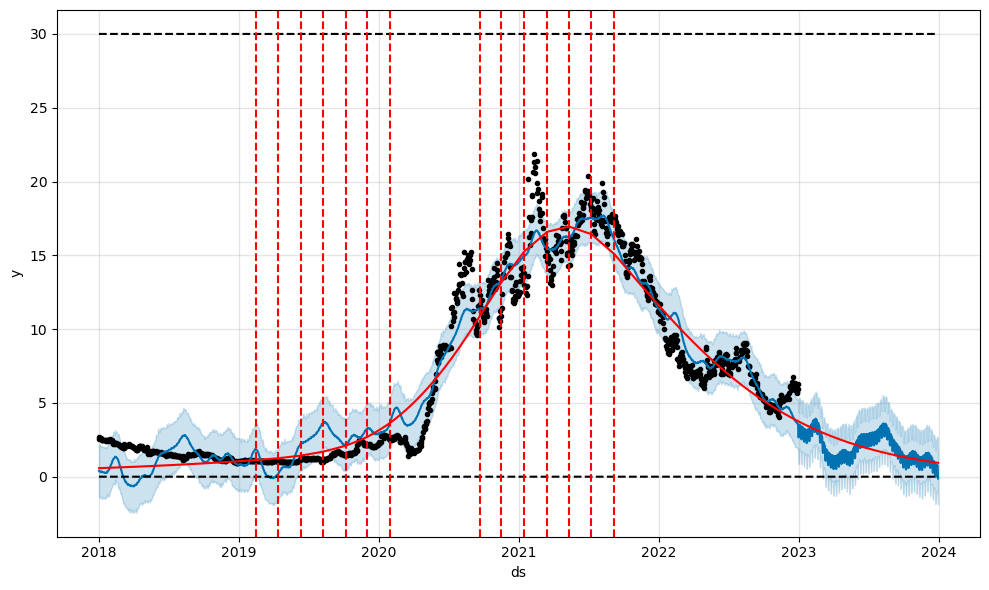

In [10]:
from prophet.plot import add_changepoints_to_plot
fig = p.plot(data_forecast)
a = add_changepoints_to_plot(fig.gca(), p, data_forecast)

<Axes: xlabel='ds'>

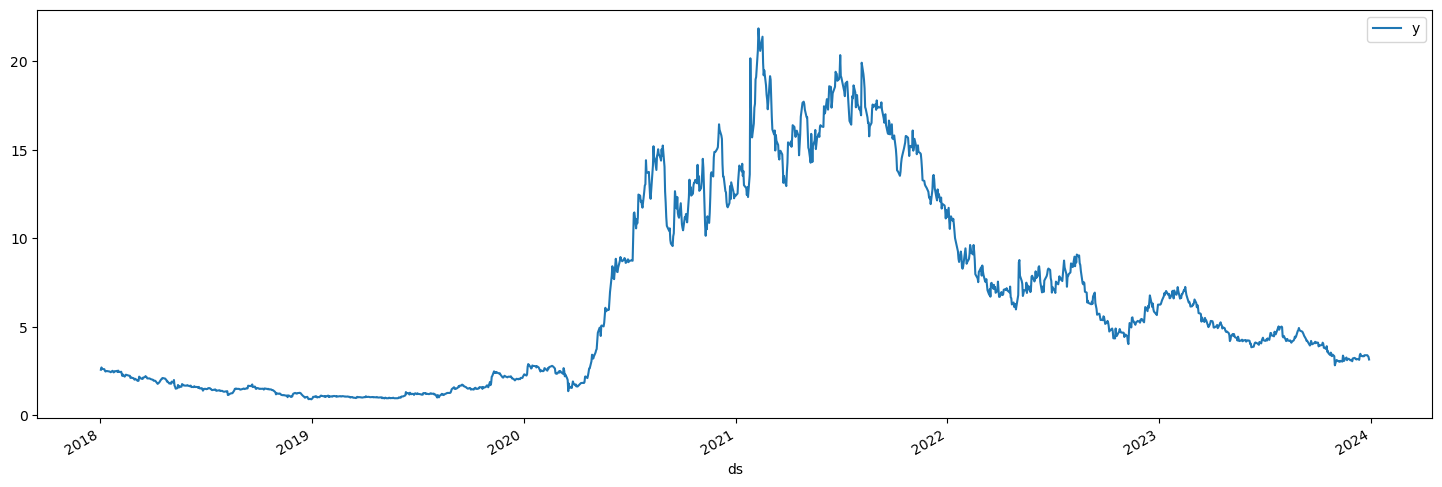

In [11]:
data.plot(x='ds',y='y',figsize=(18,6))

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

test_forecast = data_forecast[(data_forecast['ds'] >= '2023-01-01') & (data_forecast['ds'] <= '2023-12-31')]
test_forecast = test_forecast[test_forecast['ds'].isin(test_data['ds'])]

rmse = mean_squared_error(test_data['y'], test_forecast['yhat'], squared=False)
mae = mean_absolute_error(test_data['y'], test_forecast['yhat'])
mape = np.mean(np.abs((test_data['y'] - test_forecast['yhat']) / test_data['y'])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

RMSE: 2.5266269573053477
MAE: 2.354573184977972
MAPE: 41.81497443391747


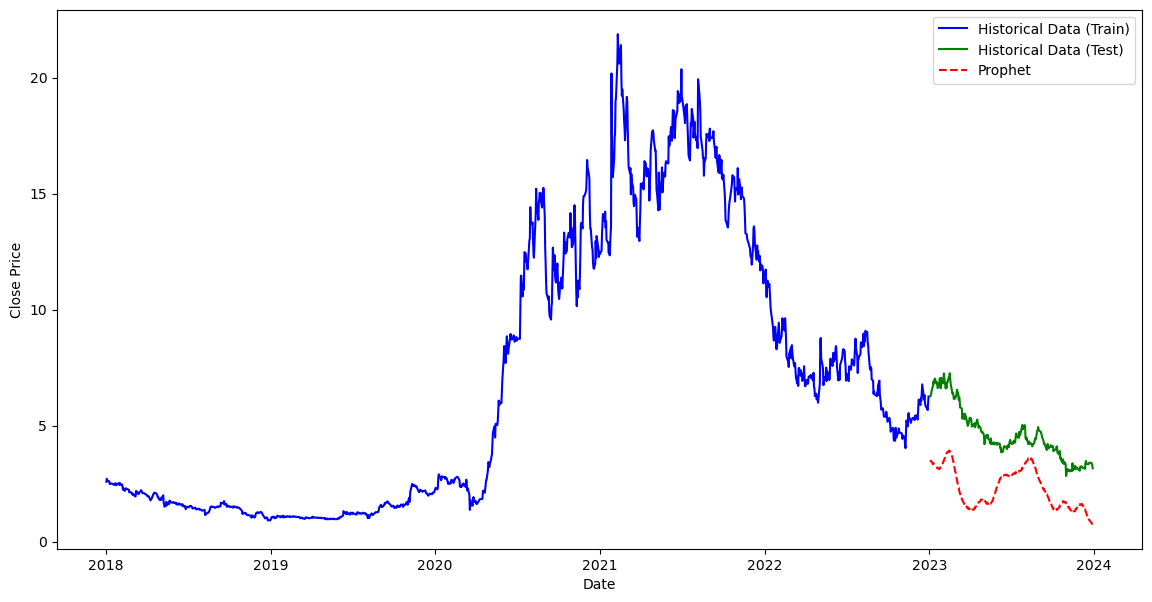

In [13]:
import matplotlib.pyplot as plt

# Визуализация на историческите данни и прогнозата
plt.figure(figsize=(14, 7))
plt.plot(train_data['ds'], train_data['y'], label='Historical Data (Train)', color='blue')
plt.plot(test_data['ds'], test_data['y'], label='Historical Data (Test)', color='green')
plt.plot(test_data['ds'], test_forecast['yhat'], label='Prophet', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()